In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)
# trial_data.head()

# Combine the data into a single dataset
data = trial_data.merge(mouse_data, on="Mouse ID", sort=True)
data.columns = ['Mouse_ID', 'Timepoint', 'Tumor_Volume_mm3', 'Metastatic_Sites', 'Drug']

# Display the data table for preview
data

,Mouse_ID,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Drug
0,a203,0,45.000000,0,Infubinol
1,a203,5,48.508468,0,Infubinol
2,a203,10,51.852437,1,Infubinol
3,a203,15,52.777870,1,Infubinol
4,a203,20,55.173336,1,Infubinol
...,...,...,...,...,...
1901,z969,25,63.145652,2,Naftisol
1902,z969,30,65.841013,3,Naftisol
1903,z969,35,69.176246,4,Naftisol
1904,z969,40,70.314904,4,Naftisol


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_group = data.groupby(["Drug", "Timepoint"])
mean_by_drug_and_time = drug_group.mean()

# Convert to DataFrame
mean_by_DT = pd.DataFrame(mean_by_drug_and_time).reset_index()

# Subset to drugs pertinent to assignment.
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
mean_by_DT = mean_by_DT[mean_by_DT.Drug.isin(drugs)]

# Preview DataFrame
mean_by_DT.head()

,Drug,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mean_by_DT_SEM = drug_group.sem()
# Convert to DataFrame
mean_by_DT_SEM = pd.DataFrame(mean_by_DT_SEM)
# Preview DataFrame
# tv_SEM = mean_by_DT_SEM.loc['Tumor_Volume_mm3']
# ms_SEM = mean_by_DT_SEM.loc['Metastatic_Sites']
mean_by_DT_SEM


Metastatic_Sites  Mouse_ID  Tumor_Volume_mm3
Drug      Timepoint                                              
Capomulin 0                  0.000000       NaN          0.000000
          5                  0.074833       NaN          0.448593
          10                 0.125433       NaN          0.702684
          15                 0.132048       NaN          0.838617
          20                 0.161621       NaN          0.909731
...                               ...       ...               ...
Zoniferol 25                 0.236621       NaN          0.602513
          30                 0.248168       NaN          0.800043
          35                 0.285714       NaN          0.881426
          40                 0.299791       NaN          0.998515
          45                 0.286400       NaN          1.003576

[100 rows x 3 columns]

In [4]:
formatting = {
    'Capomulin':['red', 'o'], 
    'Infubinol':['blue', '^'], 
    'Ketapril':['green', 's'], 
    'Placebo':['black', 'd']
}

In [5]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mean_by_DT

,Drug,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
5,Capomulin,25,39.939528,0.818182
6,Capomulin,30,38.769339,1.090909
7,Capomulin,35,37.816839,1.181818
8,Capomulin,40,36.958001,1.380952
9,Capomulin,45,36.236114,1.476190


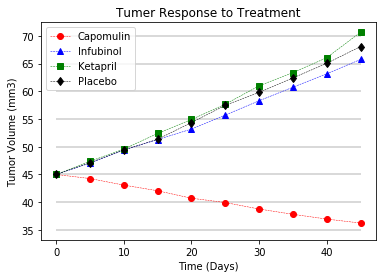

In [6]:
for drug in drugs:
    x = mean_by_DT[mean_by_DT.Drug == drug].Timepoint
    y = mean_by_DT[mean_by_DT.Drug == drug].Tumor_Volume_mm3
    plt.plot(x, y,
             linewidth = 0.5,
             linestyle = '--',
             color = formatting[drug][0],
             marker = formatting[drug][1],
    )
#     plt.errorbar(x, y, tv_SEM)
plt.legend(labels = drugs)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumer Response to Treatment')
plt.hlines(range(35, 75, 5), 0, 45, alpha=0.2)
# plt.errorbar()

In [7]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


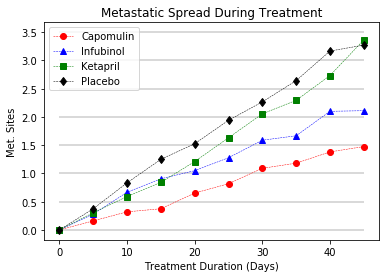

In [9]:
for drug in drugs:
    x = mean_by_DT[mean_by_DT.Drug == drug].Timepoint
    y = mean_by_DT[mean_by_DT.Drug == drug].Metastatic_Sites
    plt.plot(x, y,
             linewidth = 0.5,
             linestyle = '--',
             color = formatting[drug][0],
             marker = formatting[drug][1],
    )
#     plt.errorbar(x, y, tv_SEM)
plt.legend(labels = drugs)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.hlines(np.arange(0, 4, 0.5), 0, 45, alpha=0.2)

In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [10]:
count_by_drug_and_time = drug_group.count()
# count_by_drug_and_time.Mouse_ID.max()
count_by_DT = pd.DataFrame(count_by_drug_and_time).reset_index()
count_by_DT = count_by_DT[count_by_DT.Drug.isin(drugs)]
count_by_DT

,Drug,Timepoint,Mouse_ID,Tumor_Volume_mm3,Metastatic_Sites
0,Capomulin,0,25,25,25
1,Capomulin,5,25,25,25
2,Capomulin,10,25,25,25
3,Capomulin,15,24,24,24
4,Capomulin,20,23,23,23
5,Capomulin,25,22,22,22
6,Capomulin,30,22,22,22
7,Capomulin,35,22,22,22
8,Capomulin,40,21,21,21
9,Capomulin,45,21,21,21


In [11]:
initial_count_by_drug = count_by_DT.groupby('Drug').Mouse_ID.max()
initial_count_by_drug#['Capomulin']

Drug
Capomulin    25
Infubinol    25
Ketapril     25
Placebo      25
Name: Mouse_ID, dtype: int64

In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

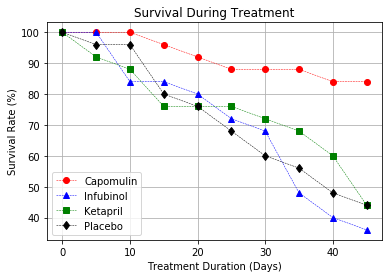

In [16]:
for drug in drugs:
    x = count_by_DT[count_by_DT.Drug == drug].Timepoint
    y = count_by_DT[count_by_DT.Drug == drug].Mouse_ID / initial_count_by_drug[drug]
    plt.plot(x, y,
             linewidth = 0.5,
             linestyle = '--',
             color = formatting[drug][0],
             marker = formatting[drug][1]
            )
#     plt.errorbar(x, y, tv_SEM)
plt.legend(labels = drugs)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Survival Rate (%)')

"""
Note: For the yticks, I found the line below to do what I wanted, 
but it feels like a hack.  I found documentation on PercentFormatter
(https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.PercentFormatter)
but the class hasn't focused much on operations on axes, only single plots, 
so I wasn't sure how to integrate the code there into this plot.
"""
plt.yticks(np.arange(0.4, 1.1 , .1), [str(x) for x in range(40, 110, 10)])
plt.title('Survival During Treatment')
plt.grid()

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [122]:
# Calculate the percent changes for each drug

# Display the data to confirm

TVmaxmin = {}

for drug in drugs:
    TVmaxmin[drug] = mean_by_DT[mean_by_DT.Drug == drug].sort_values('Timepoint').Tumor_Volume_mm3.iloc[[0, -1]].tolist()

TV_percent_change = []
for drug in drugs:
    TV_percent_change.append( round((TVmaxmin[drug][1] - TVmaxmin[drug][0]) / TVmaxmin[drug][0], 2))
TV_percent_change

TVpc_dict = {'Drug': drugs, 'Percent_Change': TV_percent_change}
TVpc_df = pd.DataFrame(TVpc_dict)
TVpc_df

,Drug,Percent_Change
0,Capomulin,-0.19
1,Infubinol,0.46
2,Ketapril,0.57
3,Placebo,0.51


In [114]:
positive = pd.Series([x > 0 for x in TV_percent_change])


Text(0.5, 1.0, 'Tumor Change Over 45 Day Treatment')

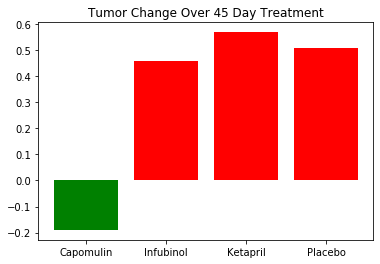

In [128]:
plt.bar(TVpc_df.Drug, TVpc_df.Percent_Change, 
        color=(TVpc_df.Percent_Change > 0).map({True: 'r',False: 'g'}))
plt.title('Tumor Change Over 45 Day Treatment')


In [16]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()

![Metastatic Spread During Treatment](../Images/change.png)